[  0.           0.01001001   0.02002002   0.03003003   0.04004004
   0.05005005   0.06006006   0.07007007   0.08008008   0.09009009
   0.1001001    0.11011011   0.12012012   0.13013013   0.14014014
   0.15015015   0.16016016   0.17017017   0.18018018   0.19019019
   0.2002002    0.21021021   0.22022022   0.23023023   0.24024024
   0.25025025   0.26026026   0.27027027   0.28028028   0.29029029
   0.3003003    0.31031031   0.32032032   0.33033033   0.34034034
   0.35035035   0.36036036   0.37037037   0.38038038   0.39039039
   0.4004004    0.41041041   0.42042042   0.43043043   0.44044044
   0.45045045   0.46046046   0.47047047   0.48048048   0.49049049
   0.5005005    0.51051051   0.52052052   0.53053053   0.54054054
   0.55055055   0.56056056   0.57057057   0.58058058   0.59059059
   0.6006006    0.61061061   0.62062062   0.63063063   0.64064064
   0.65065065   0.66066066   0.67067067   0.68068068   0.69069069
   0.7007007    0.71071071   0.72072072   0.73073073   0.74074074
   0.75075

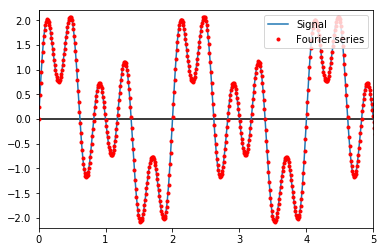

In [2]:
"""
Taken from
https://stackoverflow.com/questions/27708002/calculate-the-fourier-series-with-the-trigonometry-approach
"""
from __future__ import division
import numpy as np
import pylab as py

# Define "x" range.
# get array from 0 to 10 with 1000 dots in interval
x = np.linspace(0, 10, 1000)

# Define "T", i.e functions' period.
T = 2
L = T / 2

# "f(x)" function definition.
def f(x): 
    return np.sin((np.pi) * x) + np.sin((2 * np.pi) * x) + np.sin((5 * np.pi) * x)

# "a" coefficient calculation.
def a(n, L, accuracy = 1000):
    a, b = -L, L
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.cos((n * np.pi * x) / L)
    integration *= dx
    return (1 / L) * integration

# "b" coefficient calculation.
def b(n, L, accuracy = 1000):
    a, b = -L, L
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.sin((n * np.pi * x) / L)
    integration *= dx
    return (1 / L) * integration

# Fourier series.   
def Sf(x, L, n = 10):
    a0 = a(0, L)
    sum = np.zeros(np.size(x))
    for i in np.arange(1, n + 1):
        sum += ((a(i, L) * np.cos((i * np.pi * x) / L)) + (b(i, L) * np.sin((i * np.pi * x) / L)))
    return (a0 / 2) + sum   

# x axis.
py.plot(x, np.zeros(np.size(x)), color = 'black')

# y axis.
py.plot(np.zeros(np.size(x)), x, color = 'black')

# Original signal.
py.plot(x, f(x), linewidth = 1.5, label = 'Signal')

# Approximation signal (Fourier series coefficients).
py.plot(x, Sf(x, L), '.', color = 'red', linewidth = 1.5, label = 'Fourier series')

# Specify x and y axes limits.
py.xlim([0, 5])
py.ylim([-2.2, 2.2])

py.legend(loc = 'upper right', fontsize = '10')

py.show()